In [27]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('population_pyramid_df.csv', index_col=0)

In [3]:
df.head()

,year,age,male,female
ind,,,,
0,0,0,56,88
1,0,1,68,92
2,0,2,60,68
3,0,3,70,79
4,0,4,62,62


/home/benny/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


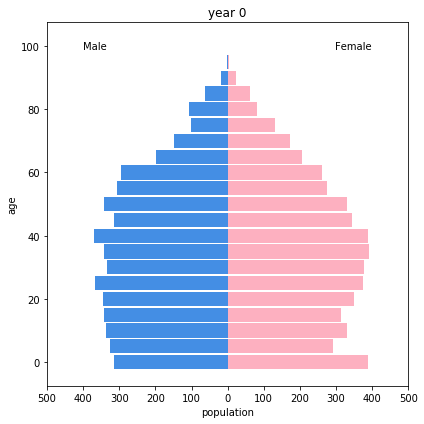

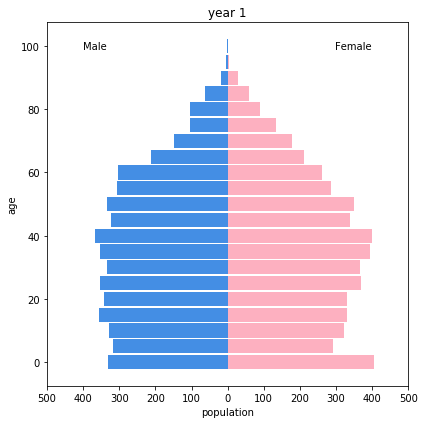

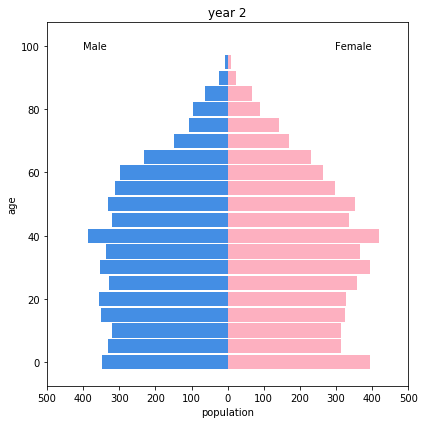

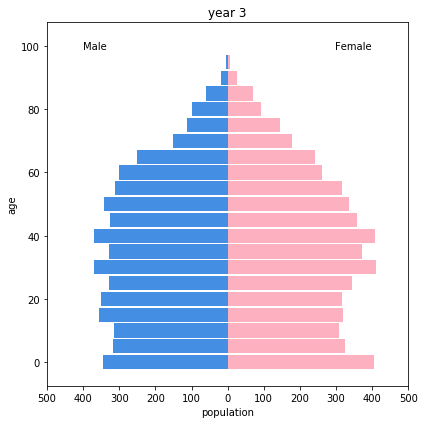

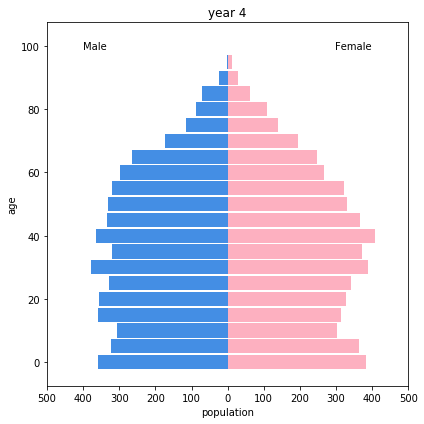

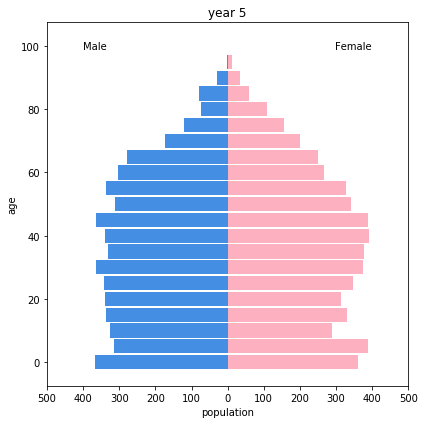

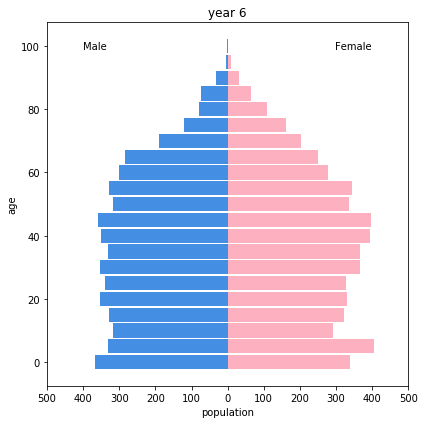

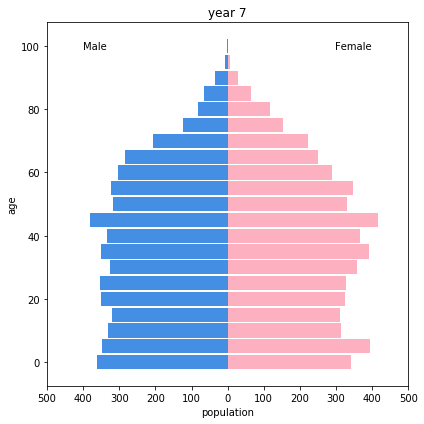

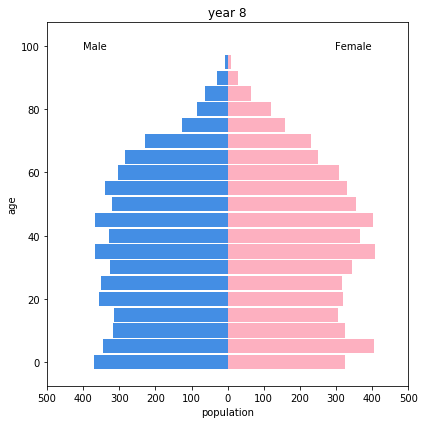

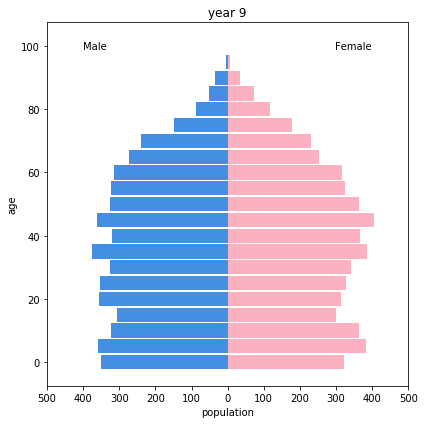

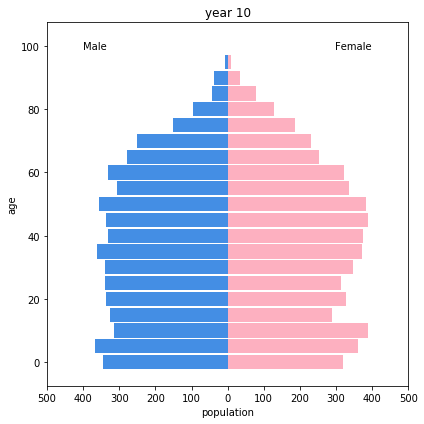

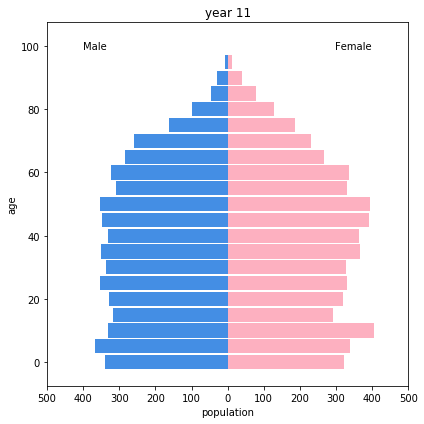

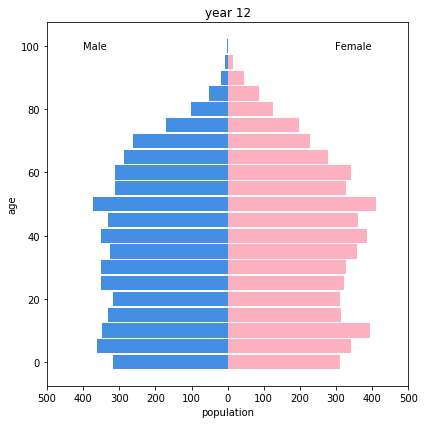

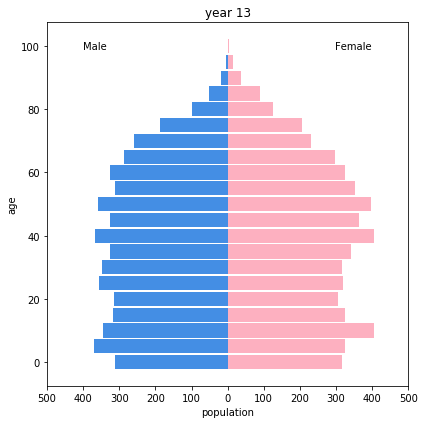

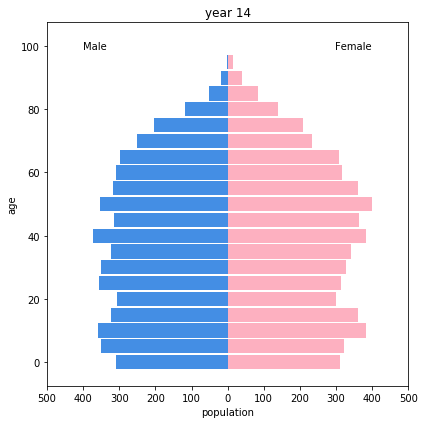

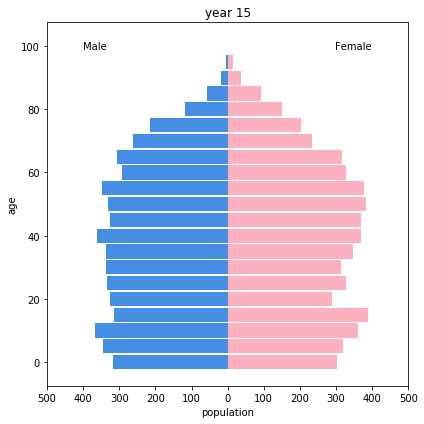

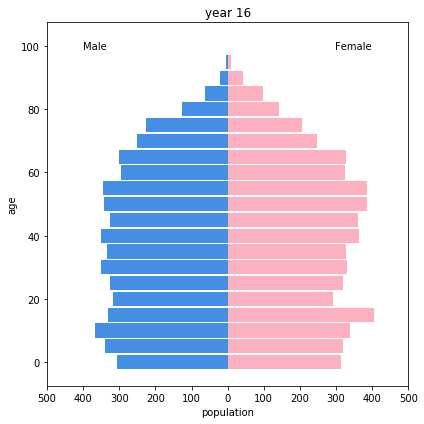

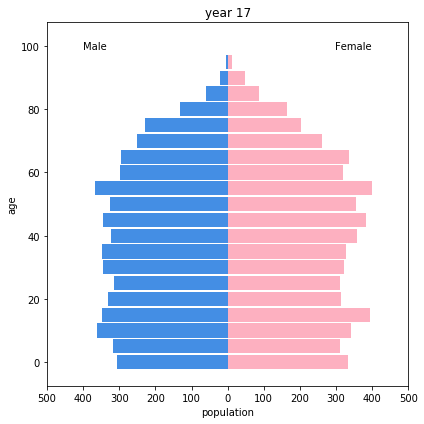

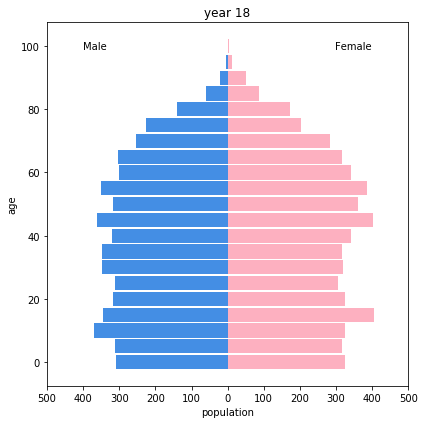

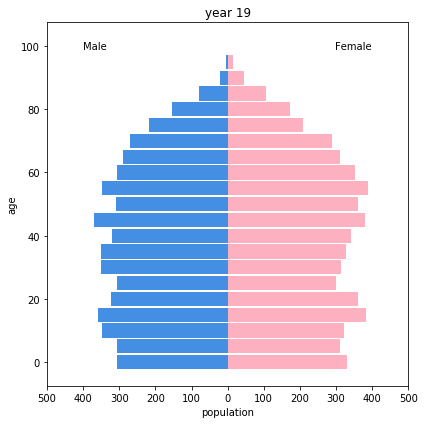

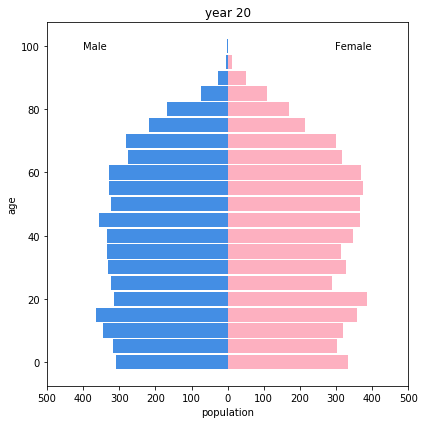

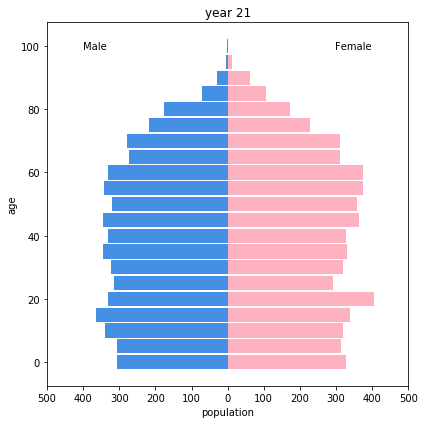

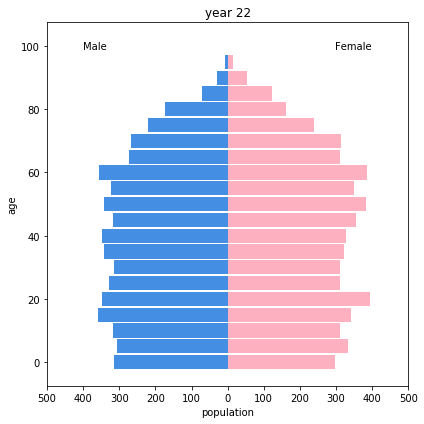

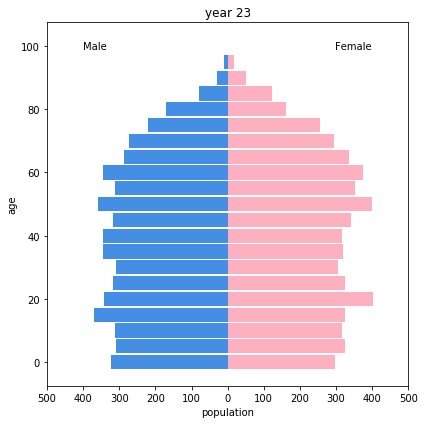

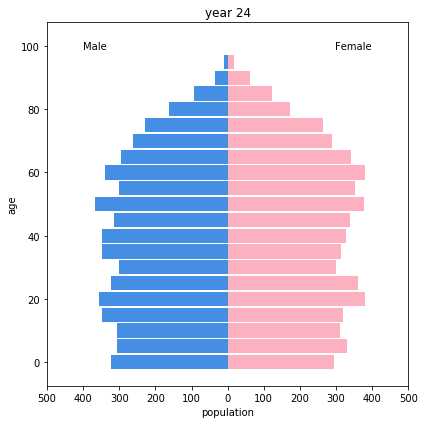

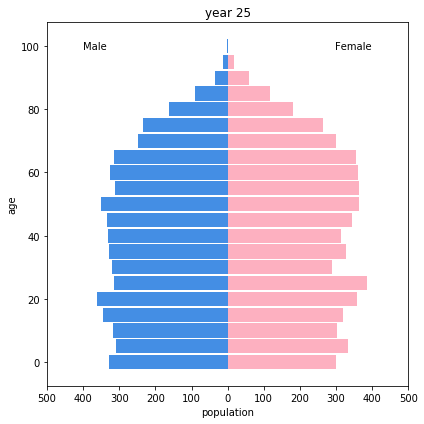

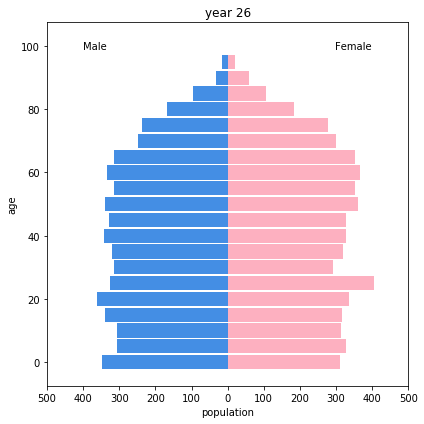

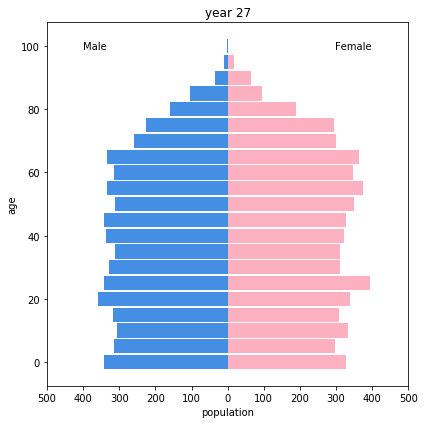

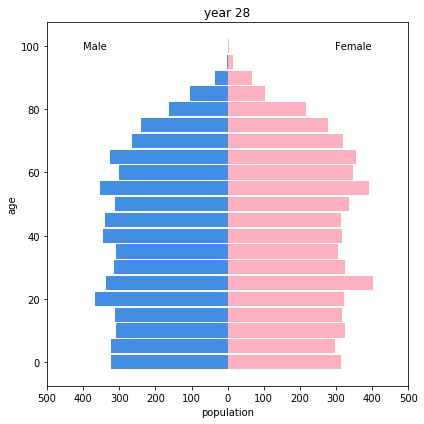

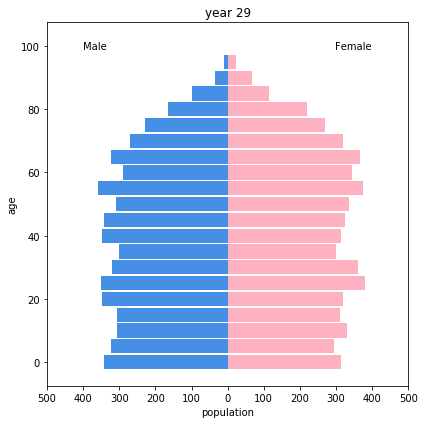

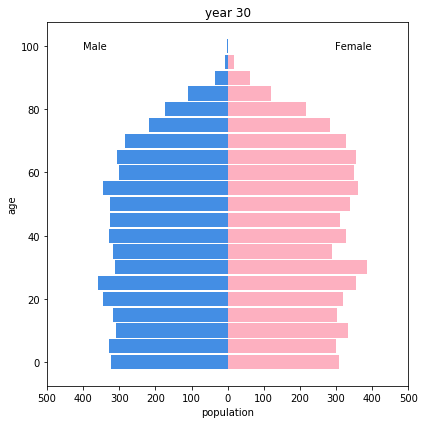

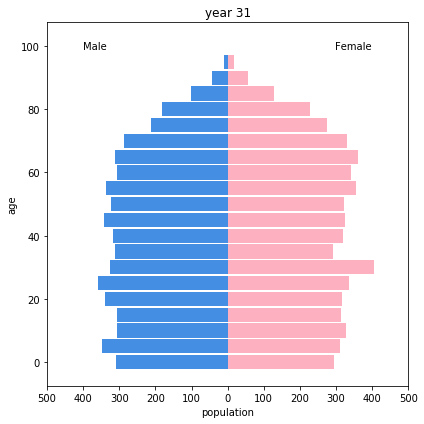

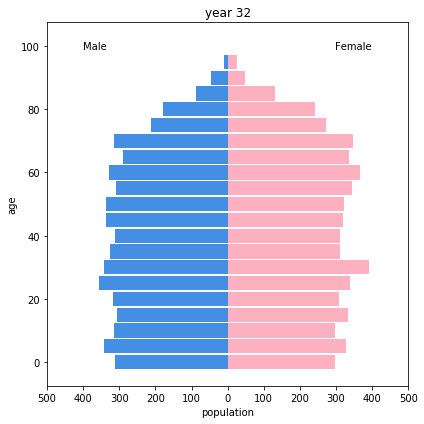

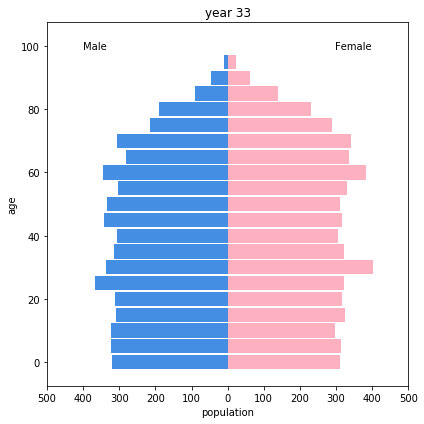

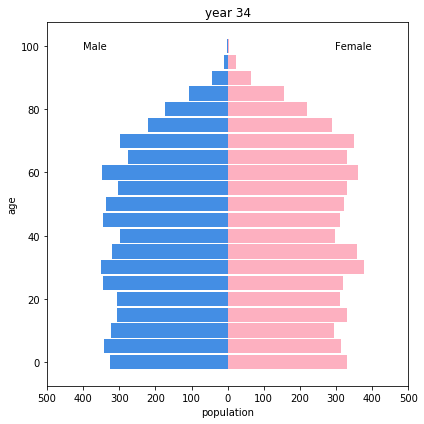

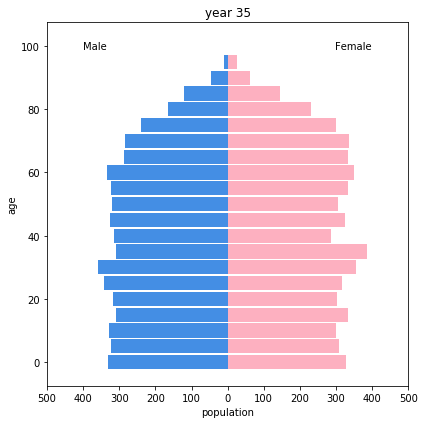

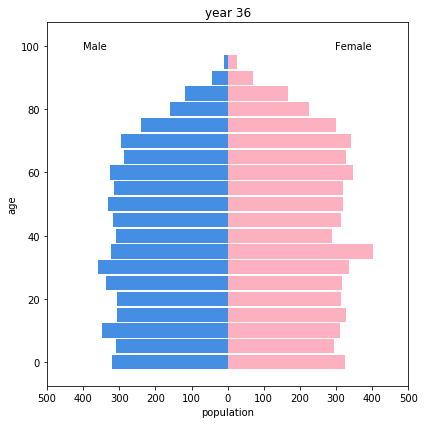

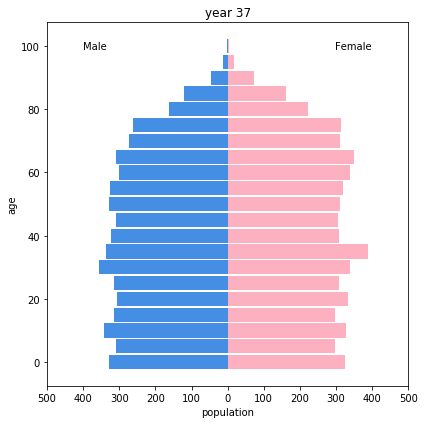

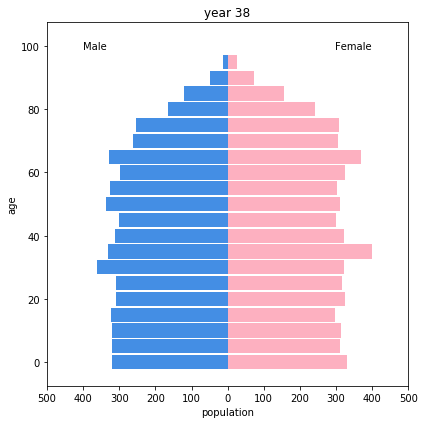

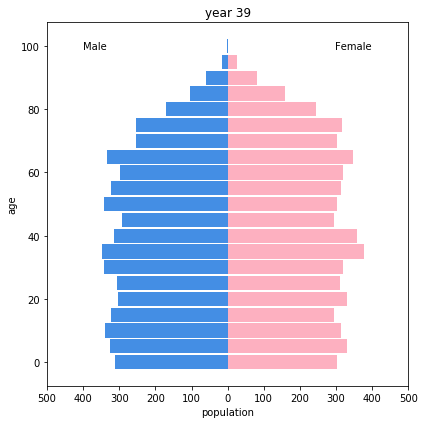

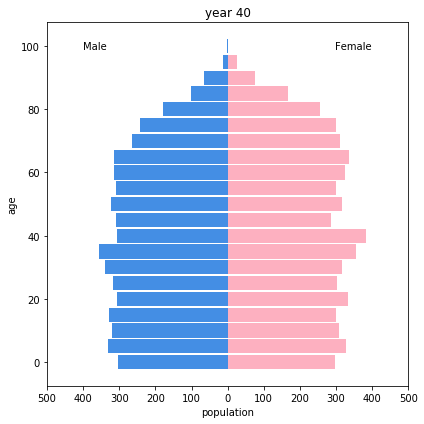

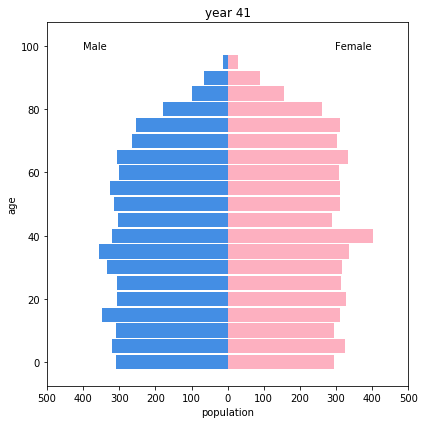

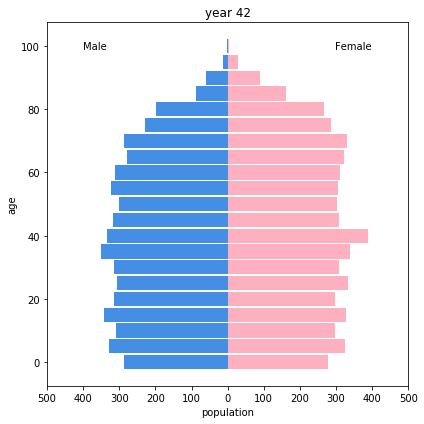

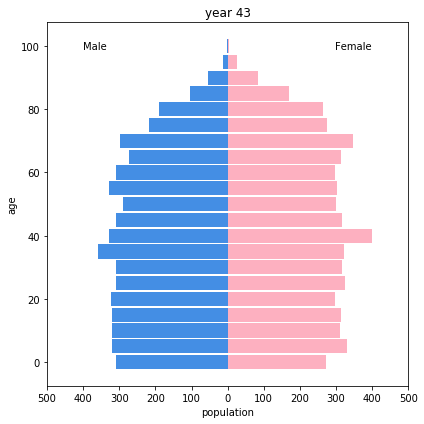

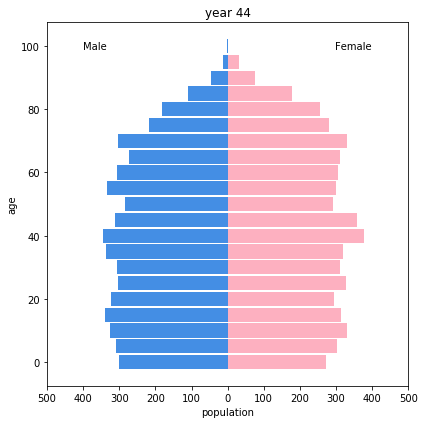

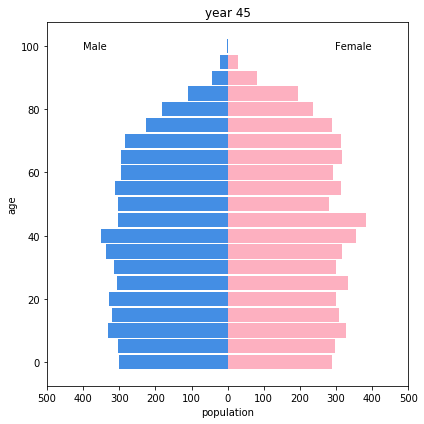

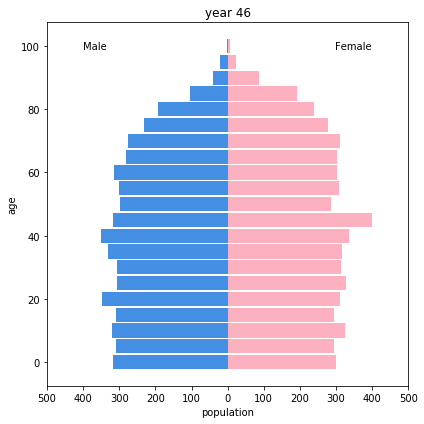

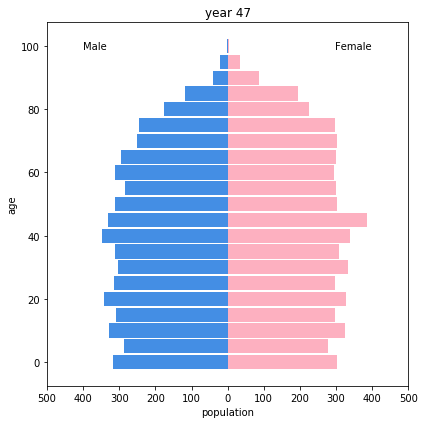

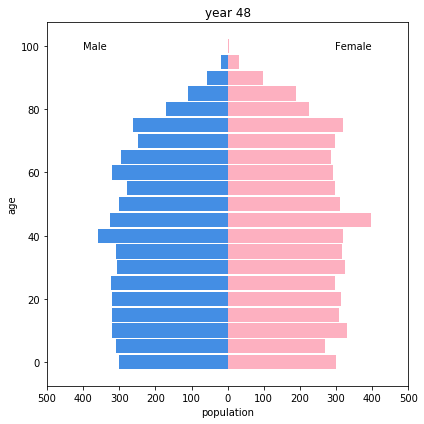

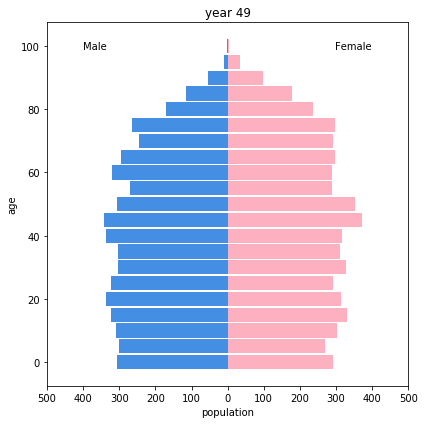

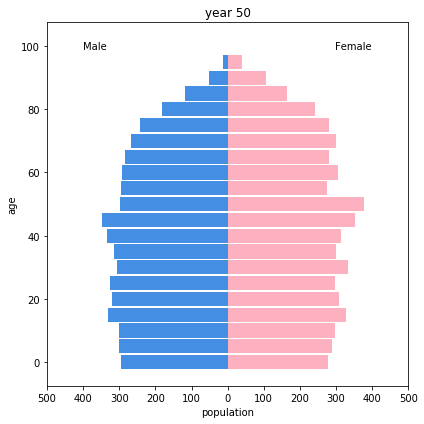

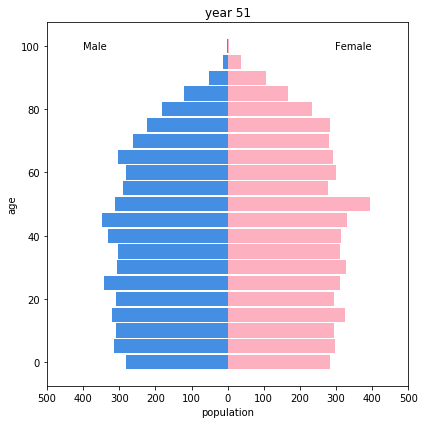

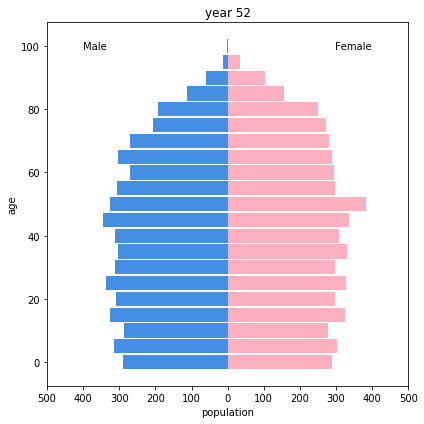

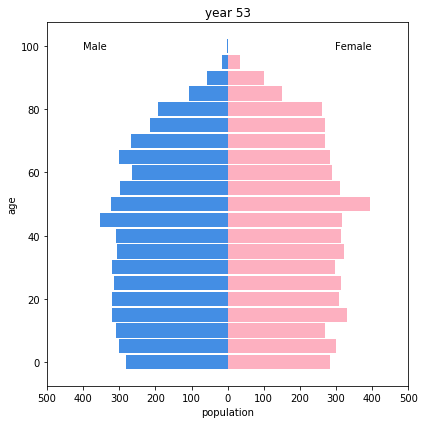

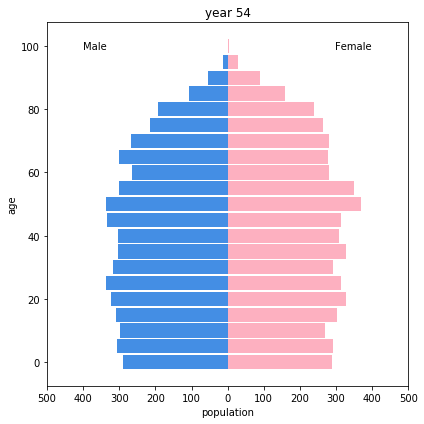

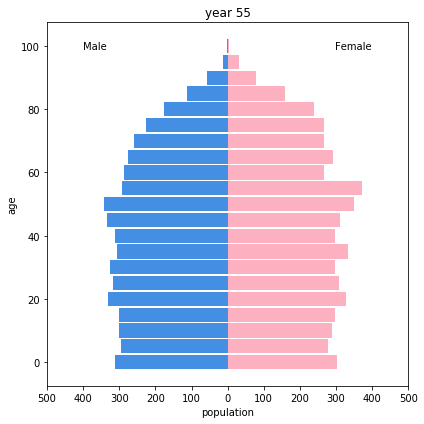

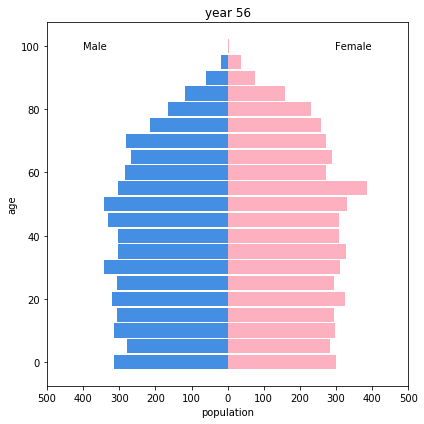

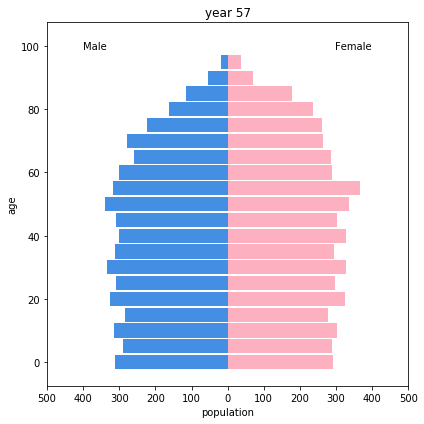

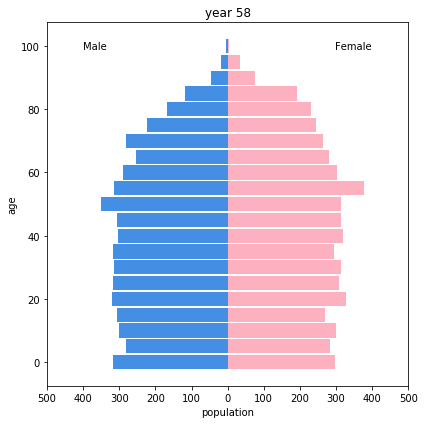

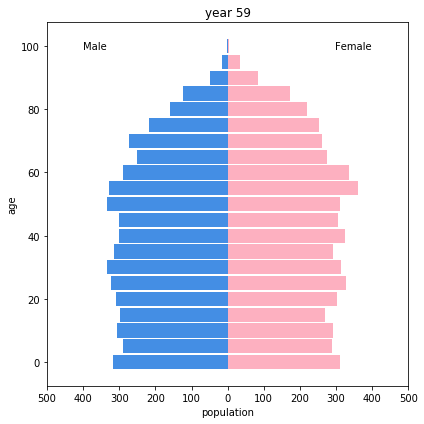

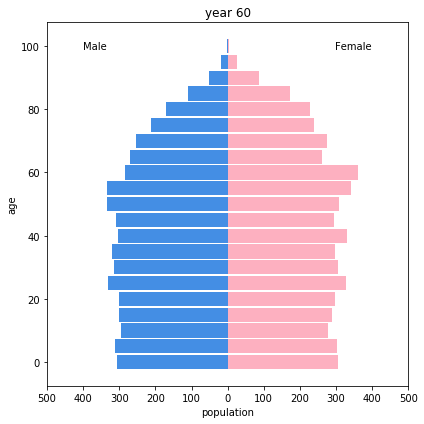

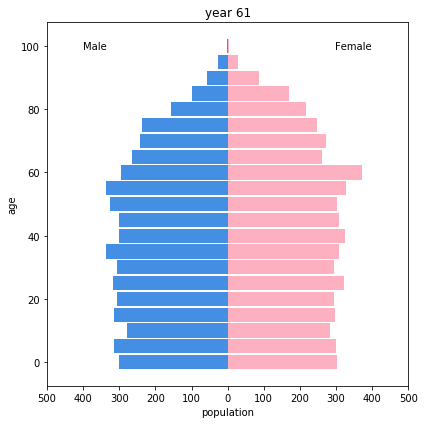

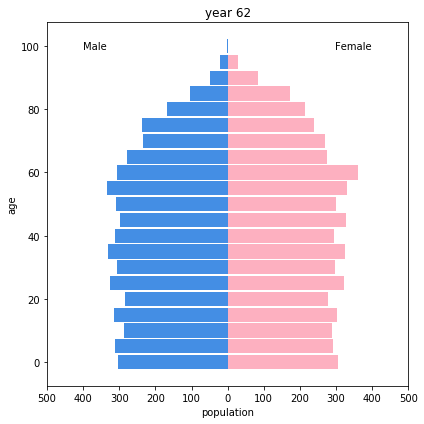

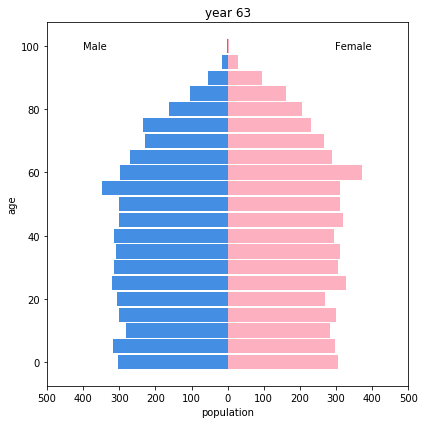

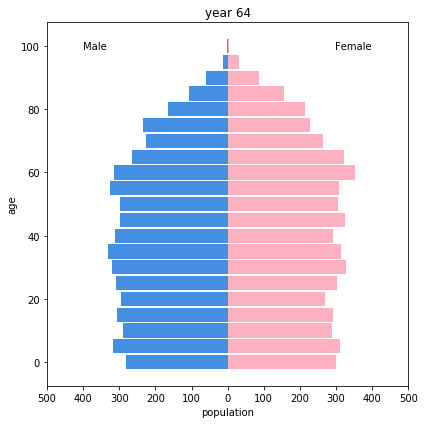

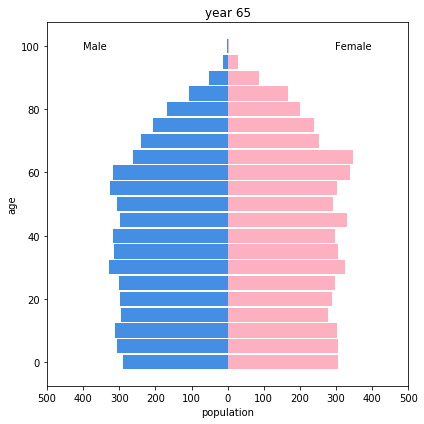

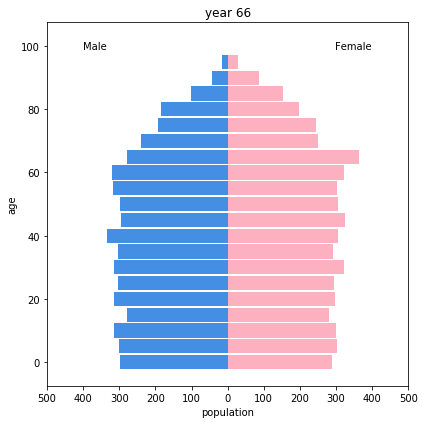

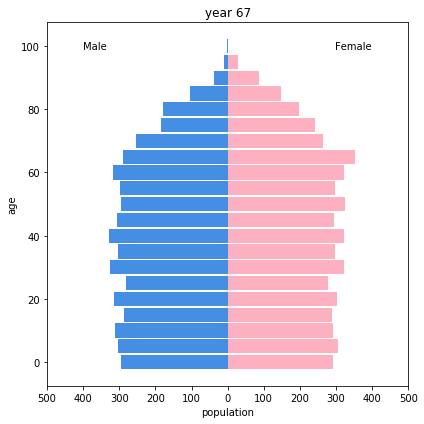

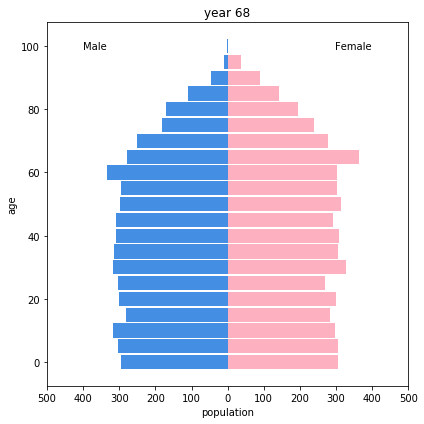

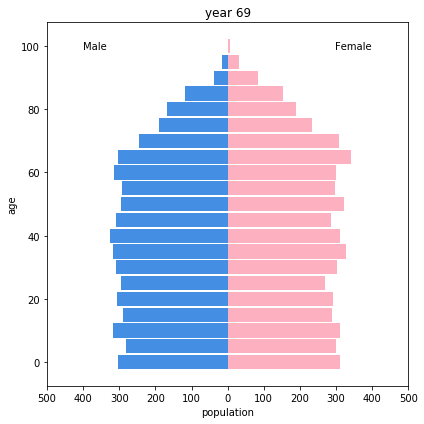

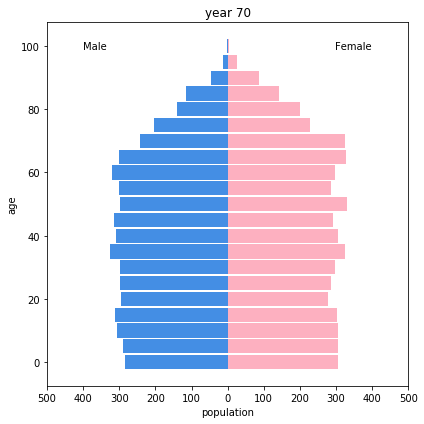

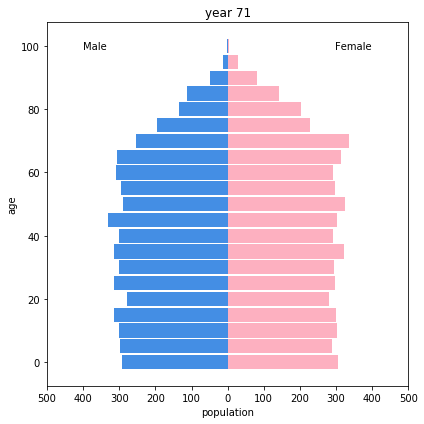

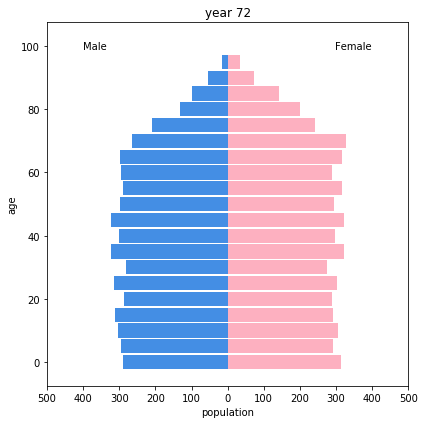

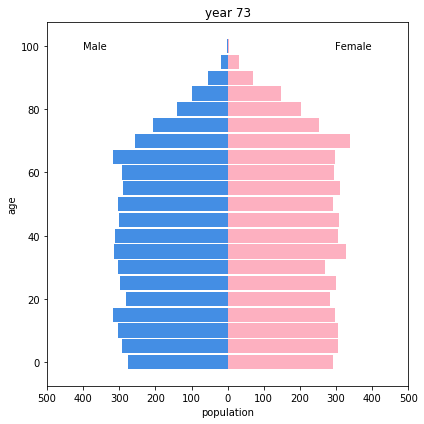

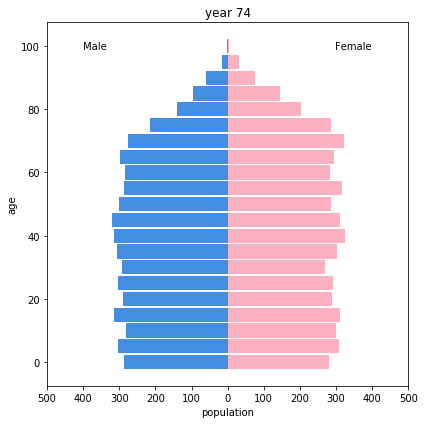

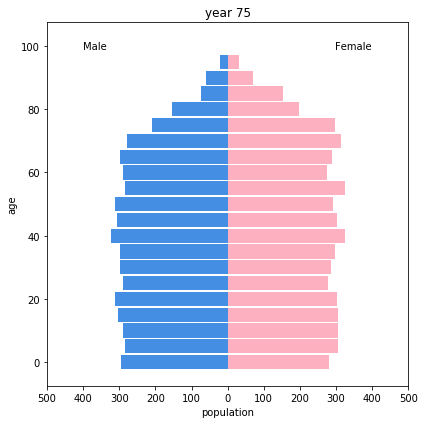

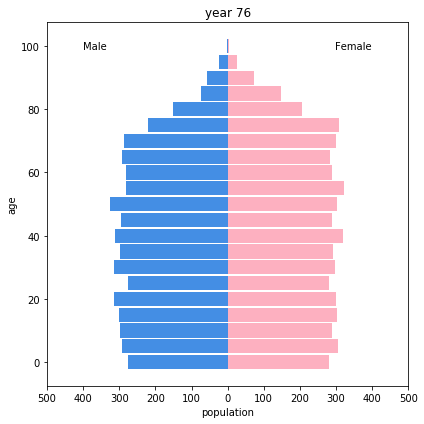

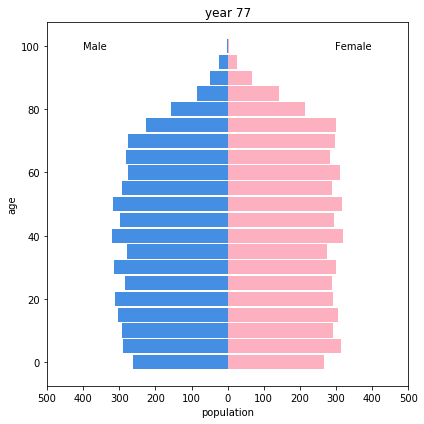

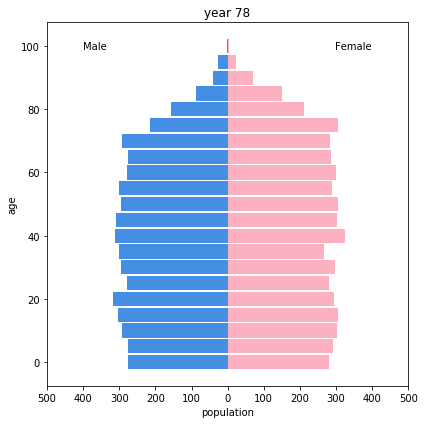

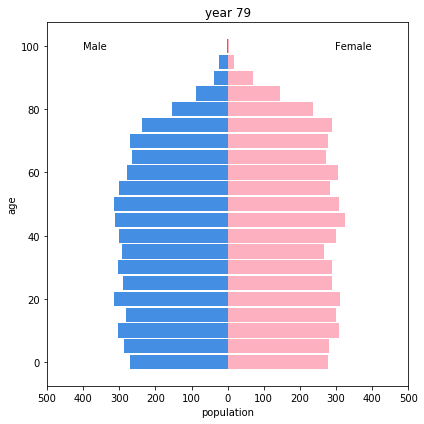

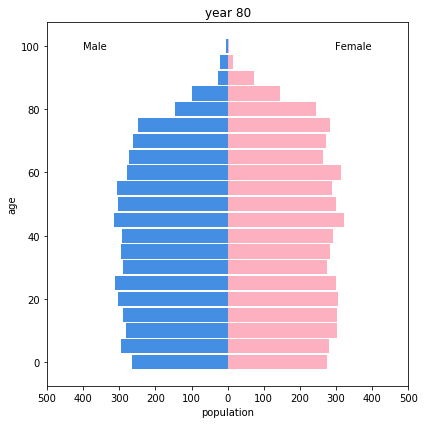

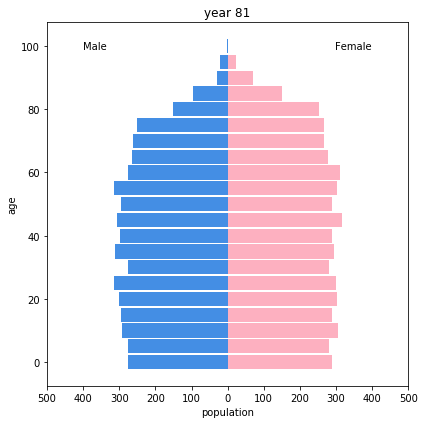

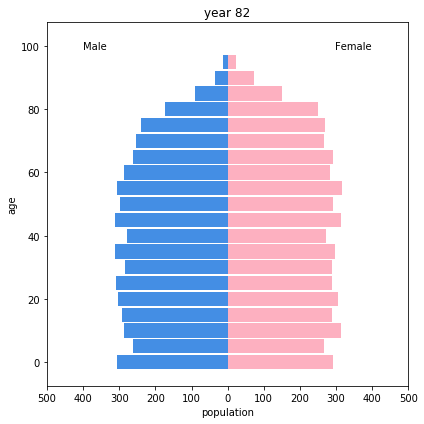

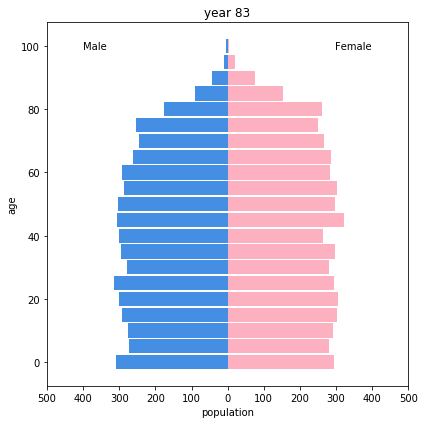

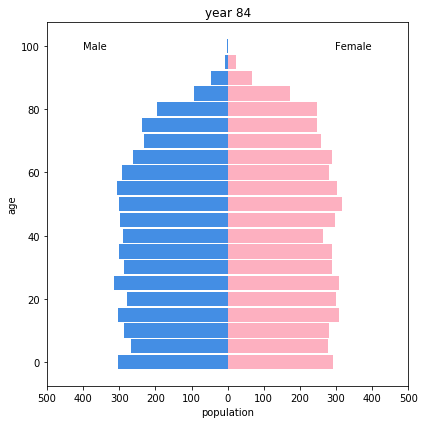

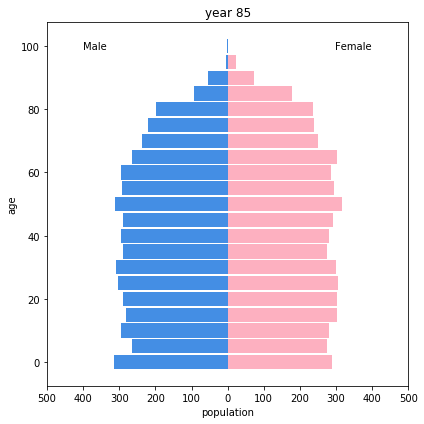

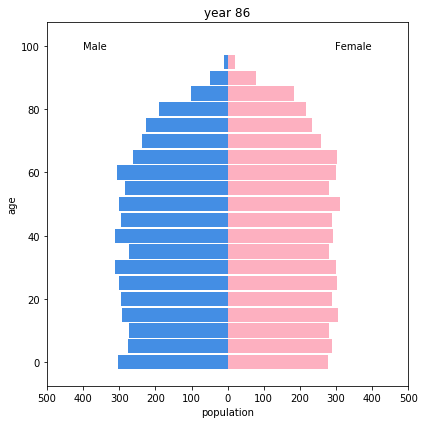

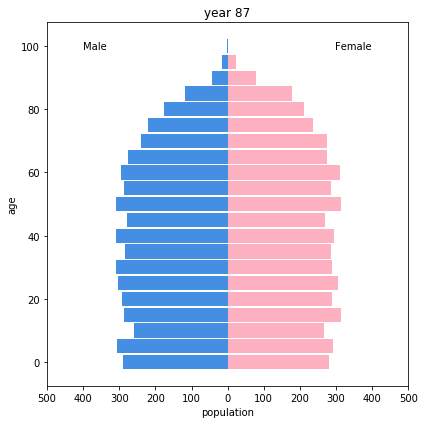

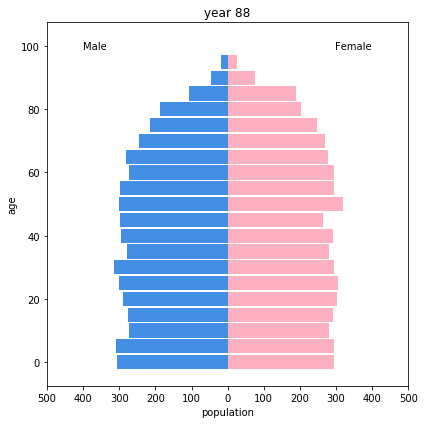

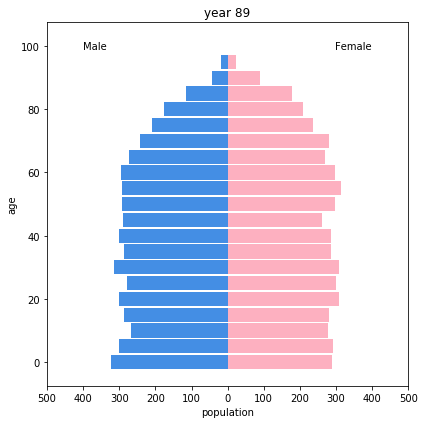

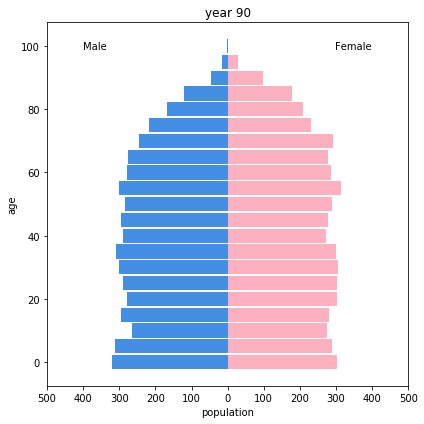

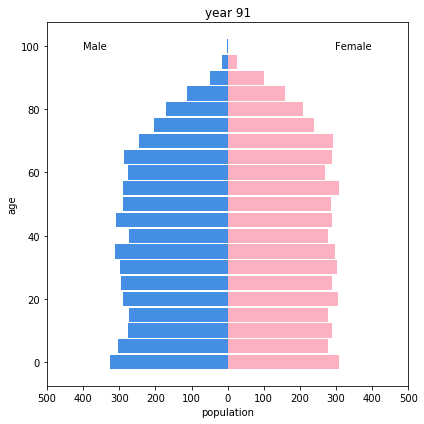

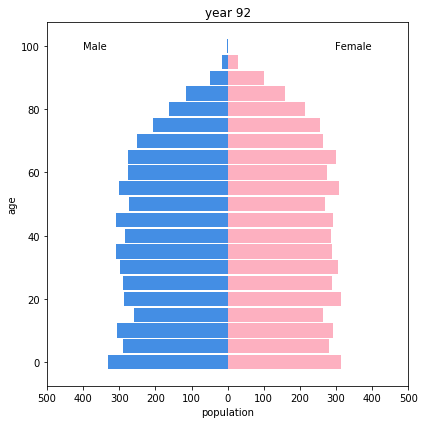

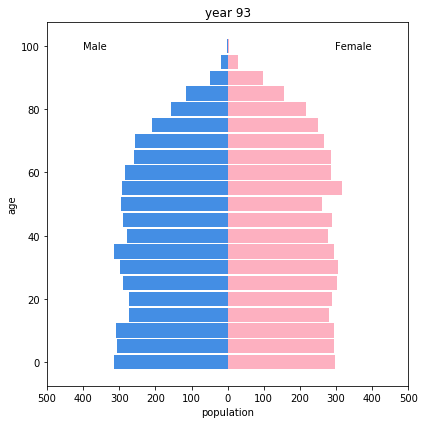

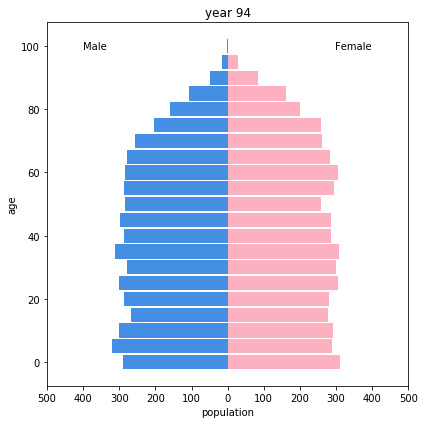

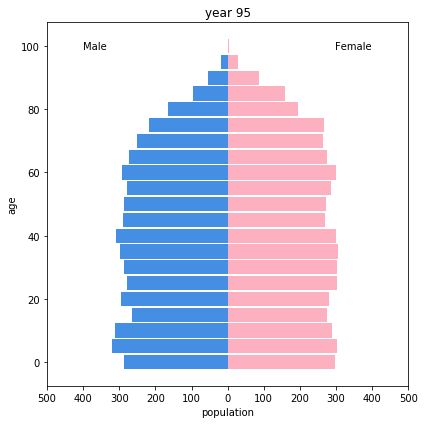

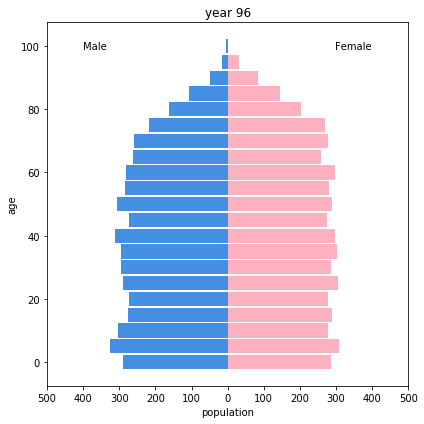

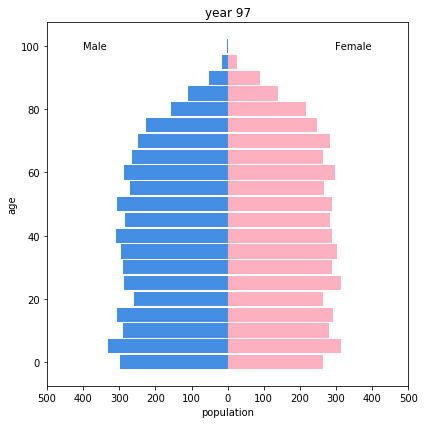

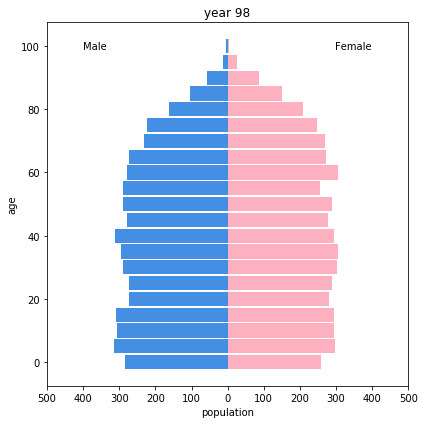

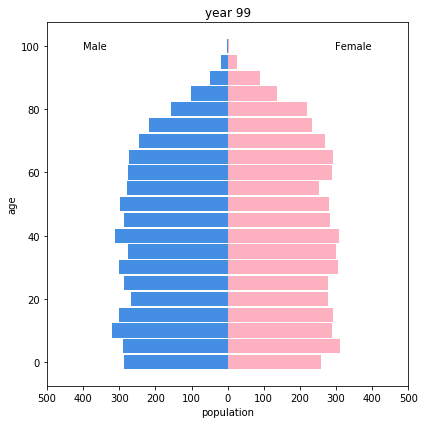

In [33]:
for y in range(100):
    temp = df[df['year']==y]
    a = temp['age']
    m = temp['male']
    f = temp['female']
    a3, m2, f2 = [], {}, {}
    for i,j,k in zip(a,m,f):
        ag = int(np.floor(i/5))*5
        if i%5==0: 
            a3.append(ag)
            m2[ag] = 0
            f2[ag] = 0
        m2[ag]+=j
        f2[ag]+=k
    m3 = [ m2[ag] for ag in a3 ]
    f3 = [ f2[ag] for ag in a3 ]
    fig, ax = plt.subplots(figsize=(6,6))
    ax.barh(a3,[ -k for k in m3 ], height=4.5, align='center', color='#448ee4')
    ax.barh(a3,[ k for k in f3 ], height=4.5, align='center', color='#fdb0c0')
    ax.set_xlim([-500,500])
    ax.set_xticks([ i*100-500 for i in range(11) ])
    ax.set_xticklabels([ abs(i*100-500) for i in range(11) ])
    ax.set_title('year {}'.format(str(y)))
    ax.set_ylabel('age')
    ax.set_xlabel('population')
    ax.text(-400, 100, 'Male', ha='left', va='center')
    ax.text(400, 100, 'Female', ha='right', va='center')
    plt.savefig(os.path.join('pyramid', 'year_{}.png'.format(str(y).zfill(2))), dpi=70)
    plt.tight_layout()
    #break